##  Neural Network - Linear Regression

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X_data = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

In [3]:
y_label =np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

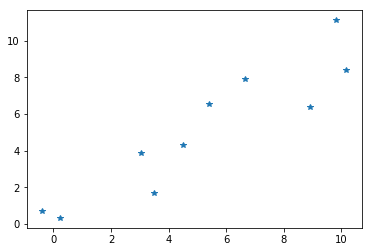

In [4]:
plt.plot(X_data,y_label,'*')

### Fitting   y = mx + b for the above data set

In [38]:
arr = np.random.rand(2)
arr

array([0.62384131, 0.1526432 ])

Text(0.5, 1.0, 'Plotted with random initial starting parameters')

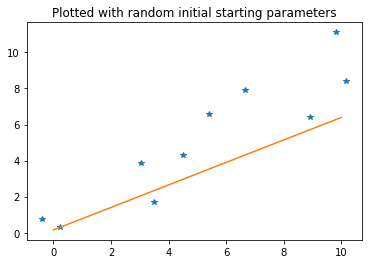

In [40]:
X_samp =np.linspace(0,10,10)
y_samp = arr[0]*X_samp +arr[1]
plt.plot(X_data,y_label,'*')
plt.plot(X_samp,y_samp)
plt.title("Plotted with random initial starting parameters")

In [41]:
m = tf.Variable(arr[0])
b = tf.Variable(arr[1])

In [42]:
error =0
for (x,y) in zip(X_data,y_label):
    y_hat= m*x + b
    error += (y_hat - y)**2
    

In [43]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)

In [44]:
model = optimizer.minimize(error)

In [45]:
init = tf.global_variables_initializer()

In [46]:
with tf.Session() as sess:
    sess.run(init)
    
    iterations = 10000
    for i in range(0,iterations):
        sess.run(model)
        #print(sess.run(error))
    final_slope , final_intercept = sess.run([m,b])
    print(sess.run(error))

17.24010180436559


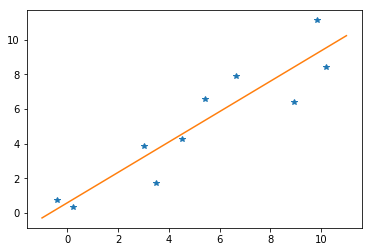

In [48]:
X_samp =np.linspace(-1,11,10)
y_samp = final_slope*X_samp +final_intercept
plt.plot(X_data,y_label,'*')
plt.plot(X_samp,y_samp)

## Another Linear regression - More complex dataset

In [49]:
import pandas as pd
n=100000

In [15]:
x_dt= np.linspace(0,10,n)

In [16]:
noise  = np.random.randn(n)

In [17]:
y_dt = 0.5*x_dt + 5+ noise

In [18]:
df = pd.DataFrame({"X":x_dt,"Y":y_dt})

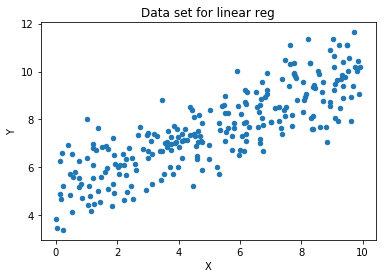

In [50]:
df.sample(n=250).plot(kind="scatter",x="X",y="Y",title="Data set for linear reg")

In [21]:
arr= np.random.randn(2)

In [51]:
arr

array([0.62384131, 0.1526432 ])

Text(0.5, 1.0, 'Plotted with random initial starting parameters')

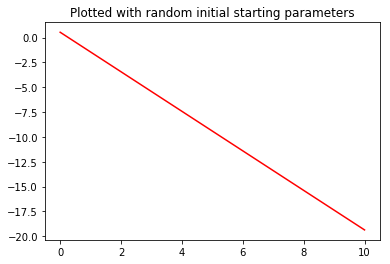

In [55]:
m_= tf.Variable(-1.99)
b_=tf.Variable(0.53)
y_hat = x_dt * (-1.99) +(0.53)
plt.plot(x_dt,y_hat,'r')
plt.title("Plotted with random initial starting parameters")

In [53]:
batch_size = 10

In [56]:
x_ph = tf.placeholder(tf.float32,[batch_size])
y_ph = tf.placeholder(tf.float32,[batch_size])

In [57]:
y_model = m_*x_ph + b_

In [58]:
error =tf.reduce_sum(tf.square(y_model-y_ph))

In [59]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
tr = optimizer.minimize(error)

In [60]:
init = tf.global_variables_initializer()

In [61]:
with tf.Session() as sess:
    sess.run(init)
    batches = 10000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_dt),size =batch_size)
        #x_ = x_dt[i*batch_size:(i+1)*batch_size]
        #y_ = y_dt[i*batch_size:(i+1)*batch_size]
        x_ = x_dt[rand_ind]
        y_ = y_dt[rand_ind]
        sess.run(tr,feed_dict={x_ph:x_,y_ph:y_})
    [final_slope, final_intercept] = sess.run([m_,b_])

In [62]:
final_slope

0.5041302

In [63]:
final_intercept

4.9627504

In [64]:
y_hat = x_dt * final_slope +final_intercept

Text(0.5, 1.0, 'Linear Regression fitted')

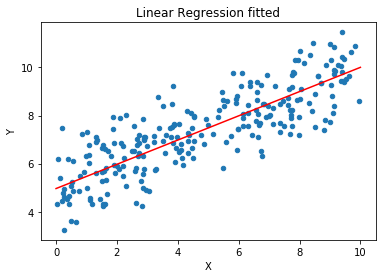

In [66]:
df.sample(n=250).plot(kind="scatter",x="X",y="Y")
plt.plot(x_dt,y_hat,'r')
plt.title("Linear Regression fitted")